In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from progress.bar import Bar

# The neural network class

In [2]:
class NNetwork:
    def __init__(self, layers: list, activate_function='sigmoid', cost_function='square_error'):
        self.layers = layers
        self.network = None
        
        if activate_function == 'sigmoid':
            self._activate_function = lambda x: 1/(1 + np.exp(-x))
            self._derivative_activate_function = lambda x: x * (1.0 - x)
            
        if cost_function == 'square_error':
            self._cost_function = lambda x, y: 1/2 * (x - y)**2
            self._derivative_cost_function = lambda x, y: x - y
        
        self._initialize_network()
    
    def _initialize_network(self):
        self.network = list()
        for i in range(1, len(self.layers)):
            layer = np.random.rand(self.layers[i], self.layers[i-1])
            self.network.append({"weights": layer, "forward": None, "deltas": None})
            
    def _forward_propagation(self, inputs: np.array):
        for layer in self.network:
            weigths = layer['weights']
            inputs = self._activate_function(weigths @ inputs)
            layer['forward'] = inputs
        return inputs
            
    def _back_propagation(self, y):
        for index in reversed(range(len(self.network))):
            layer = self.network[index]
            if index == len(self.network)-1:
                layer['deltas'] = (y - layer['forward']) * self._derivative_activate_function(layer['forward'])
            else:
                next_layer = self.network[index+1]
                layer['deltas'] = self._derivative_activate_function(layer['forward']) * (next_layer['deltas'] @ next_layer['weights'])        
    
    def _update_weights(self, inputs, lr):
        for index, layer in enumerate(self.network):
            if index == 0:
                x0, x1 = np.meshgrid(inputs, layer['deltas'])
                dw = lr * (x0 * x1)
            else:
                x0, x1 = np.meshgrid(self.network[index-1]['forward'], layer['deltas'])
                dw = lr * (x0 * x1)
            
            layer['weights'] += dw
    
    def fit(self, X, y, n_epoch=10000, lr=0.01, verbose_epoch=500):
        print("learning rate = %.3f" % lr)
        for epoch in range(n_epoch):
            for x_, y_ in zip(X, y):
                self._forward_propagation(x_)                
                self._back_propagation(y_)
                self._update_weights(x_, lr)
                
            if epoch % verbose_epoch == 0:
                error = np.sqrt(mean_squared_error(y, self.predict(X)))
                print('epoch=%d, error=%.3f' % (epoch, error))
            elif epoch == n_epoch-1:
                print('epoch=%d, error=%.3f' % (epoch+1, error))
            
    def predict(self, inputs: np.array, around=None):
        output = []
        for x in inputs:
            output.append(self._forward_propagation(x))
        
        output = np.array(output)
        if around is not None:
            output = np.around(output, decimals=around)
        return output

# The 3x3 counter

In [54]:
X = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

y = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
    [0, 0, 0]
])

In [55]:
nn = NNetwork([3, 5, 5, 3])
nn.fit(X, y, lr=0.2)

learning rate = 0.200
epoch=0, error=0.634
epoch=500, error=0.416
epoch=1000, error=0.370
epoch=1500, error=0.330
epoch=2000, error=0.234
epoch=2500, error=0.189
epoch=3000, error=0.103
epoch=3500, error=0.067
epoch=4000, error=0.053
epoch=4500, error=0.045
epoch=5000, error=0.040
epoch=5500, error=0.036
epoch=6000, error=0.033
epoch=6500, error=0.031
epoch=7000, error=0.029
epoch=7500, error=0.027
epoch=8000, error=0.026
epoch=8500, error=0.025
epoch=9000, error=0.024
epoch=9500, error=0.023
epoch=10000, error=0.023


In [57]:
nn.predict(X[:], around=0)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [56]:
nn.network

[{'weights': array([[ 2.74118129,  2.73384604,  0.3540177 ],
         [-0.53212007,  4.32525144, -4.25535499],
         [-5.51549648,  3.98401597,  2.79786713],
         [ 4.22384839, -2.12024867, -0.27300663],
         [-0.29344499, -2.9360716 ,  6.01924118]]),
  'forward': array([0.99706775, 0.386581  , 0.78011094, 0.86181968, 0.94211475]),
  'deltas': array([-3.59995248e-06, -8.61359989e-04,  1.22717607e-04,  1.77568065e-04,
          1.00291584e-04])},
 {'weights': array([[ 3.55962736,  5.34345808, -1.03172369, -4.70154527, -2.23766325],
         [ 1.03893756, -2.54946485, -1.4206578 , -0.06823608,  5.97197653],
         [ 1.61234503, -9.03820386, -0.51431573, -3.2197254 ,  4.30893546],
         [-1.70586728, -0.19936624,  8.99929047, -2.4052372 ,  1.33087186],
         [-2.07169691,  6.35313427, -0.06771379,  1.13671705, -5.24078292]]),
  'forward': array([0.20591524, 0.98911607, 0.26835625, 0.98814919, 0.02607995]),
  'deltas': array([-4.20016487e-04,  1.58552435e-06,  9.35009114

# The 4x4 counter

In [3]:
X = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])

y = np.array([
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1],
    [0, 0, 0, 0]
])

In [7]:
nn = NNetwork([4, 6, 6, 4])
nn.fit(X, y, n_epoch=20000, lr=0.2)

learning rate = 0.200
epoch=0, error=0.627
epoch=500, error=0.377
epoch=1000, error=0.234
epoch=1500, error=0.125
epoch=2000, error=0.107
epoch=2500, error=0.100
epoch=3000, error=0.097
epoch=3500, error=0.095
epoch=4000, error=0.094
epoch=4500, error=0.093
epoch=5000, error=0.092
epoch=5500, error=0.092
epoch=6000, error=0.091
epoch=6500, error=0.091
epoch=7000, error=0.090
epoch=7500, error=0.066
epoch=8000, error=0.045
epoch=8500, error=0.037
epoch=9000, error=0.032
epoch=9500, error=0.029
epoch=10000, error=0.027
epoch=10500, error=0.025
epoch=11000, error=0.023
epoch=11500, error=0.022
epoch=12000, error=0.021
epoch=12500, error=0.020
epoch=13000, error=0.019
epoch=13500, error=0.019
epoch=14000, error=0.018
epoch=14500, error=0.017
epoch=15000, error=0.017
epoch=15500, error=0.016
epoch=16000, error=0.016
epoch=16500, error=0.016
epoch=17000, error=0.015
epoch=17500, error=0.015
epoch=18000, error=0.015
epoch=18500, error=0.014
epoch=19000, error=0.014
epoch=19500, error=0.014
ep

In [8]:
nn.predict(X[:], around=0)

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 1., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.]])

# New realization with the grid search method

In [2]:
class Layer:
    def __init__(self, numbers):
        self.numbers = numbers
    
    def __repr__(self):
        return self.numbers.__repr__()
    
    def __str__(self):
        return self.numbers.__str__()

class NNetwork:
    def __init__(self, layer: Layer, activate_function='sigmoid', cost_function='squared_error'):
        self.layers = layer.numbers
        self.network = None

        self.alpha = 0.3

        if activate_function == 'sigmoid':
            self._activate_function = lambda x: 1 / (1 + np.exp(-x))
            self._derivative_activate_function = lambda x: x * (1.0 - x)
        elif activate_function == 'elu':
            self._activate_function = lambda z: np.vstack(
                list(map(lambda z: z if z >= 0 else self.alpha * (np.exp(z) - 1), z)))
            self._derivative_activate_function = lambda z: np.vstack(
                list(map(lambda z: 1 if z > 0 else self.alpha * np.exp(z), z)))

        if cost_function == 'squared_error':
            self._cost_function = lambda x, y: 1 / 2 * (x - y) ** 2
            self._derivative_cost_function = lambda x, y: x - y

        self._initialize_network()

    def _initialize_network(self):
        self.network = list()
        for i in range(1, len(self.layers)):
            layer = np.random.randn(self.layers[i], self.layers[i - 1]) * np.sqrt(2/self.layers[i-1])
            self.network.append({"weights": layer, "forward": None, "deltas": None})

    def _forward_propagation(self, inputs: np.array):
        for layer in self.network:
            weigths = layer['weights']
            inputs = self._activate_function(weigths @ inputs)
            layer['forward'] = inputs

        return inputs

    def _back_propagation(self, y):
        for index in reversed(range(len(self.network))):
            layer = self.network[index]
            if index == len(self.network) - 1:
                layer['deltas'] = (y - layer['forward']) * self._derivative_activate_function(layer['forward'])
            else:
                next_layer = self.network[index + 1]
                layer['deltas'] = self._derivative_activate_function(layer['forward']).T * (
                            next_layer['deltas'] @ next_layer['weights'])

    def _update_weights(self, inputs, lr):
        for index, layer in enumerate(self.network):
            if index == 0:
                x0, x1 = np.meshgrid(inputs, layer['deltas'])
                dw = lr * (x0 * x1)
            else:
                x0, x1 = np.meshgrid(self.network[index - 1]['forward'], layer['deltas'])
                dw = lr * (x0 * x1)

            layer['weights'] += dw

    def fit(self, X, y, n_epoch=10000, lr=0.01, verbose=True, verbose_epoch=500, flatten=False, scaling=True):
        if verbose:
            print("learning rate = %.3f" % lr)
        for epoch in range(n_epoch):
            for x_, y_ in zip(X, y):
                if flatten:
                    x_ = x_.reshape(-1, 1)
                if scaling:
                    x_ = StandardScaler().fit_transform(x_)
                self._forward_propagation(x_)
                self._back_propagation(y_)
                self._update_weights(x_, lr)

            if verbose:
                if epoch % verbose_epoch == 0:
                    error = np.sqrt(mean_squared_error(y, self.predict(X, flatten=flatten)))
                    print('epoch=%d, error=%.3f' % (epoch, error))
                elif epoch == n_epoch - 1:
                    print('epoch=%d, error=%.3f' % (epoch + 1, error))

    def predict(self, inputs: np.array, around=None, flatten=True):
        output = []
        for x in inputs:
            if flatten:
                x = x.reshape(-1, 1)
            output.append(self._forward_propagation(x))

        output = np.array(output)
        if around is not None:
            output = np.around(output, decimals=around)
        return output

In [163]:
grid_params = [
    {'layers': [Layer([4, 8, 8, 4]), Layer([4, 9, 9, 4]), Layer([4, 10, 10, 4])], 'activate_function': ['sigmoid'], 
     'cost_function': ['squared_error'], 'n_epoch': [35000], 'lr': [0.27, 0.33]}
]

In [6]:
class GridSearch:
    def __init__(self, grid_params):
        self.grid_params = grid_params
        self.best_estimator = None
        self.best_params = None
        
    def fit(self, X, y, split_data=True):
        X_train, X_test, y_train, y_test = X, X, y, y
        if split_data:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        min_error = np.inf
        
        for gp in self.grid_params:            
            grid_params = np.array(np.meshgrid(*gp.values())).T.reshape(-1, len(gp))
            
            for params in grid_params:                
                params = {key: value for key, value in zip(gp.keys(), params)}
                print("Parameters: ")
                for key, value in params.items():
                    print(f"{key}: {value}")
                
                estimator = NNetwork(layer=params['layers'], activate_function=params['activate_function'], cost_function=params['cost_function'])
                estimator.fit(X_train, y_train, n_epoch=params['n_epoch'], lr=params['lr'], verbose=False)
                
                error = np.sqrt(mean_squared_error(y_test, estimator.predict(X_test)))
                print("Loss: ", error, '\n')
                if error < min_error:
                    self.best_estimator = estimator
                    self.best_params = params
                    self.best_loss = error
                    min_error = error

In [140]:
gs = GridSearch(grid_params)
gs.fit(X, y, False)

NameError: name 'X' is not defined

In [141]:
gs.best_params

In [13]:
gs.best_loss

0.004043618179800168

In [14]:
grid_params = [
    {'layers': [Layer([4, 9, 9, 4]), Layer([4, 10, 10, 4]), Layer([4, 11, 11, 4]), Layer([4, 12, 12, 4])], 'activate_function': ['sigmoid'], 
     'cost_function': ['squared_error'], 'n_epoch': [35000], 'lr': [0.27, 0.33, 0.36, 0.4]}
]

gs = GridSearch(grid_params)
gs.fit(X, y, False)

Parameters: 
layers: [4, 9, 9, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.27
Loss:  0.004527102163320592 

Parameters: 
layers: [4, 10, 10, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.27
Loss:  0.004982682583380623 

Parameters: 
layers: [4, 11, 11, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.27
Loss:  0.005808453712347198 

Parameters: 
layers: [4, 12, 12, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.27
Loss:  0.004955974493372239 

Parameters: 
layers: [4, 9, 9, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.33
Loss:  0.003697313854540265 

Parameters: 
layers: [4, 10, 10, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.33
Loss:  0.004414185550958853 

Parameters: 
layers: [4, 11, 11, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 35000
lr: 0.33
Loss:  0.004

In [16]:
grid_params = [
    {'layers': [Layer([4, 16, 16, 4])], 'activate_function': ['sigmoid'], 
     'cost_function': ['squared_error'], 'n_epoch': [100000], 'lr': [1]}
]

gs = GridSearch(grid_params)
gs.fit(X, y, False)

Parameters: 
layers: [4, 16, 16, 4]
activate_function: sigmoid
cost_function: squared_error
n_epoch: 100000
lr: 1
Loss:  0.001086347569079432 



In [19]:
gs.best_estimator.predict(X, around = 0)

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 1., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.]])

# MNIST recognition

Task: build a neural network that can to recognize even digits

In [3]:
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
def draw_image(images, limit_per_row=5):
    for index, image in enumerate(images):
        image = image.reshape(28, 28)
        n_rows = (len(images)-1) // limit_per_row + 1
        plt.subplot(n_rows, limit_per_row, index+1)
        plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
        plt.axis('off')

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train_even = (y_train % 2 == 0).astype(int)
y_test_even = (y_test % 2 == 0).astype(int)

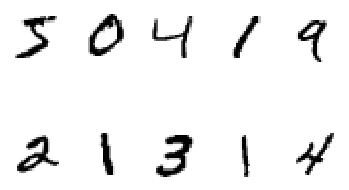

In [6]:
draw_image(X_train[:10])

In [23]:
class Layer:
    def __init__(self, numbers):
        self.numbers = numbers

    def __repr__(self):
        return self.numbers.__repr__()

    def __str__(self):
        return self.numbers.__str__()


class NNetwork:
    def __init__(self, layer: Layer, activate_functions: list, alpha=0.3, cost_function='squared_error'):
        self.layers = layer.numbers
        self.activate_functions = activate_functions
        self.network = None

        self.alpha = alpha

        if cost_function == 'squared_error':
            self._cost_function = lambda x, y: 1 / 2 * (x - y) ** 2
            self._derivative_cost_function = lambda x, y: x - y

        self._initialize_network()

    def _get_activate_functions(self, name):
        if name == 'sigmoid':
            activate_function = lambda x: 1 / (1 + np.exp(-x))
            derivative_activate_function = lambda x: x * (1.0 - x)
        elif name == 'elu':
            activate_function = lambda z: np.vstack(
                list(map(lambda z: z if z >= 0 else self.alpha * (np.exp(z) - 1), z)))
            derivative_activate_function = lambda z: np.vstack(
                list(map(lambda z: 1 if z > 0 else self.alpha * np.exp(z), z)))

        return activate_function, derivative_activate_function

    def _initialize_network(self):
        self.network = list()
        for i, activate_name in zip(range(1, len(self.layers)), self.activate_functions):
            activate_func, derivative_func = self._get_activate_functions(activate_name)
            weights = np.random.randn(self.layers[i], self.layers[i - 1]) * np.sqrt(2 / self.layers[i - 1])
            self.network.append({"weights": weights, "forward": None,
                                 "activate": activate_func, "derivative": derivative_func, "deltas": None})

    def _forward_propagation(self, inputs: np.array):
        for layer in self.network:
            weights = layer['weights']
            activate_func = layer['activate']
            inputs = activate_func(weights @ inputs)
            layer['forward'] = inputs

        return inputs

    def _back_propagation(self, y):
        for index in reversed(range(len(self.network))):
            layer = self.network[index]
            derivative = layer['derivative']
            if index == len(self.network) - 1:
                layer['deltas'] = (y - layer['forward']) * derivative(layer['forward'])
            else:
                next_layer = self.network[index + 1]
                layer['deltas'] = derivative(layer['forward']).T * (
                        next_layer['deltas'] @ next_layer['weights'])

    def _update_weights(self, inputs, lr):
        for index, layer in enumerate(self.network):
            if index == 0:
                x0, x1 = np.meshgrid(inputs, layer['deltas'])
                dw = lr * (x0 * x1)
            else:
                x0, x1 = np.meshgrid(self.network[index - 1]['forward'], layer['deltas'])
                dw = lr * (x0 * x1)

            layer['weights'] += dw

    def fit(self, X, y, n_epoch=10000, lr=0.01, batch_size=30, validate_batch_size=10000, verbose=True, verbose_epoch=500, flatten=False, scaling=True):
        if verbose:
            print("learning rate = %.6f" % lr)
        for epoch in range(n_epoch):
            indexes = np.random.randint(0, len(X), size=batch_size)
            X_sample, y_sample = X[indexes], y[indexes]
            for x_, y_ in zip(X_sample, y_sample):
                if flatten:
                    x_ = x_.reshape(-1, 1)
                if scaling:
                    x_ = StandardScaler().fit_transform(x_)
                self._forward_propagation(x_)
                self._back_propagation(y_)
                self._update_weights(x_, lr)

            if verbose:
                if epoch % verbose_epoch == 0:
                    indexes = np.random.randint(0, len(X), size=validate_batch_size)
                    error = np.sqrt(mean_squared_error(y[indexes], self.predict(X[indexes], flatten=flatten)))
                    print('epoch=%d, error=%.3f' % (epoch, error))
                elif epoch == n_epoch - 1:
                    indexes = np.random.randint(0, len(X), size=validate_batch_size)
                    error = np.sqrt(mean_squared_error(y[indexes], self.predict(X[indexes], flatten=flatten)))
                    print('epoch=%d, error=%.3f' % (epoch + 1, error))

    def predict(self, inputs: np.array, around=None, flatten=True):
        output = []
        for x in inputs:
            if flatten:
                x = x.reshape(-1, 1)
            output.append(self._forward_propagation(x))

        output = np.vstack(output)
        if around is not None:
            output = np.around(output, decimals=around)
        return output

In [54]:
NN = NNetwork(Layer([784, 300, 100, 50, 1]), ['elu', 'elu', 'elu', 'sigmoid'])
NN.fit(X_train, y_train_even, n_epoch=100, batch_size=100, validate_batch_size=1000, flatten=True, verbose_epoch=10, lr=0.001)

learning rate = 0.001000
epoch=0, error=0.633
epoch=10, error=0.443
epoch=20, error=0.417
epoch=30, error=0.393
epoch=40, error=0.380
epoch=50, error=0.340
epoch=60, error=0.328
epoch=70, error=0.326
epoch=80, error=0.345
epoch=90, error=0.341
epoch=100, error=0.275


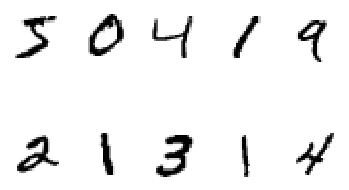

In [55]:
draw_image(X_train[:10])

In [56]:
NN.predict(X_train[:10], around=0)

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [57]:
y_train_even[:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
y_pred = NN.predict(X_test[:5000], around=0)

In [60]:
accuracy_score(y_test_even[:5000], y_pred)

0.8854